## Cognitive Robotics and Computer Vision Assignment

### STEP 1. DOWNLOAD & PREPARE THE CIFAR-10 DATASET

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html
/kaggle/input/cifar10-preprocessed/model_histories_ConvNet1_Training.pickle
/kaggle/input/cifar10-preprocessed/model_params_ConvNet1.pickle
/kaggle/input/cifar10-preprocessed/mean_and_std.pickle
/kaggle/input/cifar10-preprocessed/get_CIFAR-10.sh
/kaggle/input/cifar10-preprocessed/labels.txt
/kaggle/input/cifar10-preprocessed/model_histories_ConvNet1_Overfitting.pickle
/kaggle/input/cifar10-preprocessed/datasets_preparing.py
/kaggle/input/cifar10-prepr

2025-05-03 11:49:36.210007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746272976.400414     171 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746272976.455228     171 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html
/kaggle/input/cifar10-preprocessed/model_histories_ConvNet1_Training.pickle
/kaggle/input/cifar10-preprocessed/model_params_ConvNet1.pickle
/kaggle/input/cifar10-preprocessed/mean_and_std.pickle
/kaggle/input/cifar10-preprocessed/get_CIFAR-10.sh
/kaggle/input/cifar10-preprocessed/labels.txt
/kaggle/input/cifar10-preprocessed/model_histories_ConvNet1_Overfitting.pickle
/kaggle/input/cifar10-preprocessed/datasets_preparing.py
/kaggle/input/cifar10-prepr

In [3]:
import os
import pickle
import numpy as np

data_dir = "/kaggle/input/cifar10-python/cifar-10-batches-py"

def load_cifar10_batch(batch_path):
    with open(batch_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        return images, np.array(labels)

# Load training batches
x_train, y_train = [], []
for i in range(1, 6):
    data, labels = load_cifar10_batch(os.path.join(data_dir, f"data_batch_{i}"))
    x_train.append(data)
    y_train.append(labels)

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

# Load test batch
x_test, y_test = load_cifar10_batch(os.path.join(data_dir, "test_batch"))

# Convert to expected format
x_train = x_train.astype("uint8")
x_test = x_test.astype("uint8")
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Mimic keras.datasets.cifar10.load_data() output
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


Displaying 5 sample images from the training set:


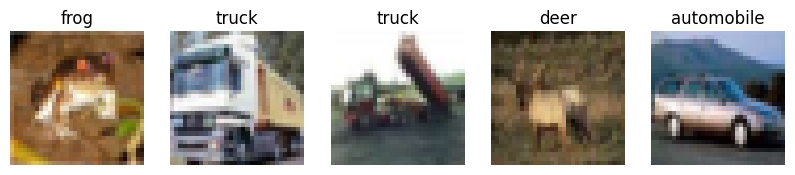

In [4]:
# 2. Display 5 Samples
# Define class names for CIFAR-10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display sample images from the dataset
def display_sample_images(x_data, y_data, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_data[i])
        plt.title(classes[y_data[i][0]])
        plt.axis('off')
    plt.show()

# Visualize 5 sample images from the training set to check data integrity
print("Displaying 5 sample images from the training set:")
display_sample_images(x_train, y_train, num_images=5)

In [5]:
# 3. Analyze class distribution
print("\nClass distribution in training set:")
for i in range(10):
    count = np.sum(y_train == i)
    print(f"  {classes[i]}: {count} images ({count/len(y_train)*100:.1f}%)")

print("\nClass distribution in test set:")
for i in range(10):
    count = np.sum(y_test == i)
    print(f"  {classes[i]}: {count} images ({count/len(y_test)*100:.1f}%)")


Class distribution in training set:
  airplane: 5000 images (10.0%)
  automobile: 5000 images (10.0%)
  bird: 5000 images (10.0%)
  cat: 5000 images (10.0%)
  deer: 5000 images (10.0%)
  dog: 5000 images (10.0%)
  frog: 5000 images (10.0%)
  horse: 5000 images (10.0%)
  ship: 5000 images (10.0%)
  truck: 5000 images (10.0%)

Class distribution in test set:
  airplane: 1000 images (10.0%)
  automobile: 1000 images (10.0%)
  bird: 1000 images (10.0%)
  cat: 1000 images (10.0%)
  deer: 1000 images (10.0%)
  dog: 1000 images (10.0%)
  frog: 1000 images (10.0%)
  horse: 1000 images (10.0%)
  ship: 1000 images (10.0%)
  truck: 1000 images (10.0%)


In [6]:
# 4. Check basic statistics of the dataset
print("Training data min pixel value:", np.min(x_train))
print("Training data max pixel value:", np.max(x_train))
print("Training data shape:", x_train.shape)
print("Training data dtype:", x_train.dtype)
print("Unique training labels:", np.unique(y_train))

Training data min pixel value: 0
Training data max pixel value: 255
Training data shape: (50000, 32, 32, 3)
Training data dtype: uint8
Unique training labels: [0 1 2 3 4 5 6 7 8 9]


In [7]:
# 5. Normalize pixel values for CNN (using your normalization code)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Verify normalization (your verification)
print("Normalized training data min pixel value:", np.min(x_train_normalized))
print("Normalized training data max pixel value:", np.max(x_train_normalized))
print("Normalized training data shape:", x_train_normalized.shape)

Normalized training data min pixel value: 0.0
Normalized training data max pixel value: 1.0
Normalized training data shape: (50000, 32, 32, 3)


In [8]:
# 6. One-hot encode the labels for CNN
print("\nCreating one-hot encoded labels for CNN...")
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

# Display the original and one-hot encoded labels for verification
print("Original label format (first 5 examples):")
print(y_train[:5])
print("\nOne-hot encoded label format (first 5 examples):")
print(y_train_onehot[:5])
print("\nOne-hot encoded shape:", y_train_onehot.shape)


Creating one-hot encoded labels for CNN...
Original label format (first 5 examples):
[[6]
 [9]
 [9]
 [4]
 [1]]

One-hot encoded label format (first 5 examples):
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

One-hot encoded shape: (50000, 10)


In [9]:
# 7. Prepare data for Traditional CV (Bag of Words) approach
print("\nPreparing data for Bag of Words approach...")
# Convert to grayscale and resize to 64x64 for better feature extraction
x_train_gray = np.zeros((x_train.shape[0], 64, 64), dtype=np.uint8)
x_test_gray = np.zeros((x_test.shape[0], 64, 64), dtype=np.uint8)

for i in range(len(x_train)):
    gray = cv2.cvtColor(x_train[i], cv2.COLOR_RGB2GRAY)
    x_train_gray[i] = cv2.resize(gray, (64, 64))

for i in range(len(x_test)):
    gray = cv2.cvtColor(x_test[i], cv2.COLOR_RGB2GRAY)
    x_test_gray[i] = cv2.resize(gray, (64, 64))

print("Grayscale training data shape:", x_train_gray.shape)
print("Grayscale test data shape:", x_test_gray.shape)


Preparing data for Bag of Words approach...
Grayscale training data shape: (50000, 64, 64)
Grayscale test data shape: (10000, 64, 64)


In [10]:
# 8. Create validation split for CNN
print("\nCreating validation split for CNN approach...")
x_train_cnn, x_val_cnn, y_train_cnn_onehot, y_val_cnn_onehot = train_test_split(
    x_train_normalized, y_train_onehot, test_size=0.1, random_state=42, stratify=y_train
)

# Also create a validation split with original labels (for metrics calculation)
_, _, y_train_cnn, y_val_cnn = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print("CNN training data shape:", x_train_cnn.shape)
print("CNN validation data shape:", x_val_cnn.shape)
print("CNN training labels shape (one-hot):", y_train_cnn_onehot.shape)
print("CNN validation labels shape (one-hot):", y_val_cnn_onehot.shape)


Creating validation split for CNN approach...
CNN training data shape: (45000, 32, 32, 3)
CNN validation data shape: (5000, 32, 32, 3)
CNN training labels shape (one-hot): (45000, 10)
CNN validation labels shape (one-hot): (5000, 10)


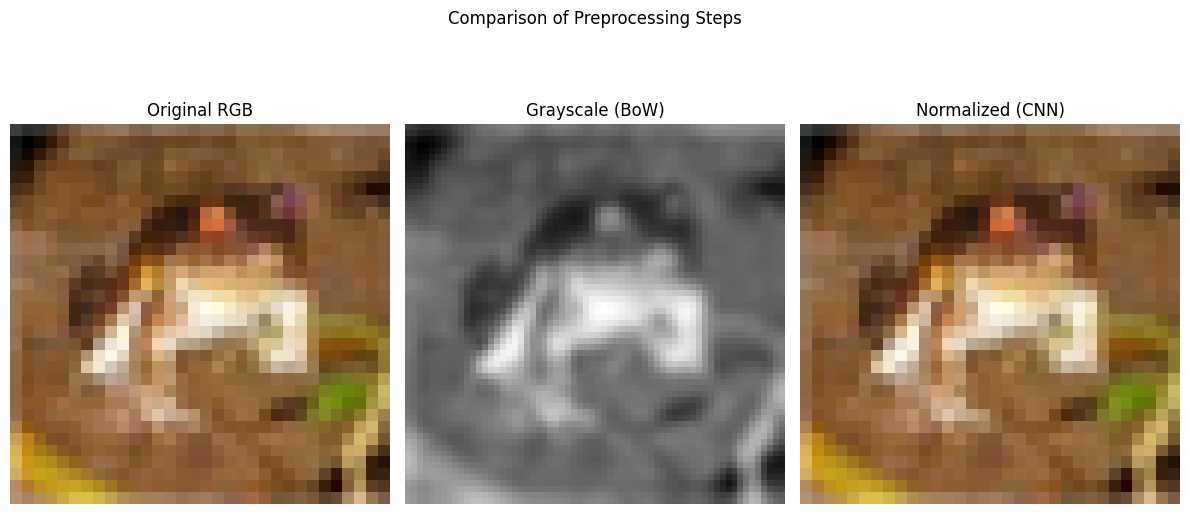

In [11]:
# 9. Visualize the effect of preprocessing
plt.figure(figsize=(12, 6))

# 10.1 Original RGB image
plt.subplot(1, 3, 1)
plt.imshow(x_train[0])
plt.title("Original RGB")
plt.axis('off')

# 10.2 Grayscale image (for BoW)
plt.subplot(1, 3, 2)
plt.imshow(x_train_gray[0], cmap='gray')
plt.title("Grayscale (BoW)")
plt.axis('off')

# 10.3 Normalized image (for CNN)
plt.subplot(1, 3, 3)
plt.imshow(x_train_normalized[0])  # Will appear the same but pixel values are [0,1]
plt.title("Normalized (CNN)")
plt.axis('off')

plt.suptitle("Comparison of Preprocessing Steps")
plt.tight_layout()
plt.savefig('cifar10_preprocessing.png', dpi=300)
plt.show()

In [12]:
# 10. Save processed data for faster loading in the next steps
print("\nSaving processed data...")

# For traditional CV approach
# np.save('cifar10_train_gray.npy', x_train_gray)
# np.save('cifar10_test_gray.npy', x_test_gray)
np.save('cifar10_train_gray_64.npy', x_train_gray)
np.save('cifar10_test_gray_64.npy', x_test_gray)
np.save('cifar10_train_labels.npy', y_train)
np.save('cifar10_test_labels.npy', y_test)

# For CNN approach
np.save('cifar10_train_cnn.npy', x_train_cnn)
np.save('cifar10_val_cnn.npy', x_val_cnn)
np.save('cifar10_test_cnn.npy', x_test_normalized)
np.save('cifar10_train_cnn_labels.npy', y_train_cnn)
np.save('cifar10_train_cnn_onehot.npy', y_train_cnn_onehot)
np.save('cifar10_val_cnn_onehot.npy', y_val_cnn_onehot)
np.save('cifar10_test_onehot.npy', y_test_onehot)


Saving processed data...


In [13]:
# 11. Summary
print("\nDataset preparation complete!")
print("Summary:")
print(f"- Total training images: {len(x_train)}")
print(f"- Total test images: {len(x_test)}")
print(f"- Image dimensions: {x_train.shape[1]}x{x_train.shape[2]} pixels, {x_train.shape[3]} channels")
print(f"- Number of classes: {len(classes)}")
print(f"- Labels converted to one-hot format for CNN")
print(f"- Saved files for BoW and CNN approaches")
print("Ready to proceed with feature extraction and model training!")


Dataset preparation complete!
Summary:
- Total training images: 50000
- Total test images: 10000
- Image dimensions: 32x32 pixels, 3 channels
- Number of classes: 10
- Labels converted to one-hot format for CNN
- Saved files for BoW and CNN approaches
Ready to proceed with feature extraction and model training!


In [14]:
import numpy as np
import cv2
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    precision_recall_fscore_support
)
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import time

# === CONFIGURATION ===
TRAIN_SIZE = 20000
TEST_SIZE = 10000
STEP_SIZE = 2
VOCAB_SIZE = 1000
SVM_C = 10.0
RESULT_DIR = "bow_results_final"
os.makedirs(RESULT_DIR, exist_ok=True)

# === 1. Load Data ===
x_train_gray = np.load("cifar10_train_gray_64.npy")[:TRAIN_SIZE]
x_test_gray = np.load("cifar10_test_gray_64.npy")[:TEST_SIZE]
y_train = np.load("cifar10_train_labels.npy").ravel()[:TRAIN_SIZE]
y_test = np.load("cifar10_test_labels.npy").ravel()[:TEST_SIZE]

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# === 2. Contrast Enhancement (CLAHE) ===
def apply_clahe(images):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return np.array([clahe.apply(img) for img in images])

x_train_clahe = apply_clahe(x_train_gray)
x_test_clahe = apply_clahe(x_test_gray)

# === 3. Dense SIFT ===
def extract_dense_sift(images, step_size=STEP_SIZE):
    sift = cv2.SIFT_create()
    descriptors_list = []
    for img in tqdm(images, desc="Extracting Dense SIFT"):
        kp = [cv2.KeyPoint(x, y, step_size)
              for y in range(0, img.shape[0], step_size)
              for x in range(0, img.shape[1], step_size)]
        _, des = sift.compute(img, kp)
        descriptors_list.append(des if des is not None else np.array([]))
    return descriptors_list

train_desc = extract_dense_sift(x_train_clahe)
test_desc = extract_dense_sift(x_test_clahe)

# === 4. Codebook with MiniBatchKMeans ===
def create_codebook(descriptors_list, k=VOCAB_SIZE, max_samples=200000):
    all_desc = np.vstack([d for d in descriptors_list if d.size > 0])
    if len(all_desc) > max_samples:
        all_desc = all_desc[np.random.choice(len(all_desc), max_samples, replace=False)]
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42)
    kmeans.fit(all_desc.astype(np.float32))
    return kmeans

codebook = create_codebook(train_desc, k=VOCAB_SIZE)

# === 5. Histograms ===
def build_bow_histograms(descriptors_list, codebook, k):
    histograms = np.zeros((len(descriptors_list), k), dtype=np.float32)
    for i, descriptors in enumerate(descriptors_list):
        if descriptors.size > 0:
            words = codebook.predict(descriptors.astype(np.float32))
            for word in words:
                histograms[i, word] += 1
        else:
            histograms[i] = np.ones(k)
    return histograms

train_hist = build_bow_histograms(train_desc, codebook, VOCAB_SIZE)
test_hist = build_bow_histograms(test_desc, codebook, VOCAB_SIZE)

# === 6. TF-IDF Normalization ===
tfidf = TfidfTransformer(norm='l2')
train_hist_tfidf = tfidf.fit_transform(train_hist).toarray()
test_hist_tfidf = tfidf.transform(test_hist).toarray()

# # === 7. Train + Evaluate SVM ===
# start_train = time.time()
# svm = SVC(kernel='rbf', C=SVM_C, gamma='scale', random_state=42)
# svm.fit(train_hist_tfidf, y_train)
# train_time = time.time() - start_train

# start_test = time.time()
# y_pred = svm.predict(test_hist_tfidf)
# test_time = time.time() - start_test

# acc = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, target_names=classes, digits=3)
# conf_matrix = confusion_matrix(y_test, y_pred)
# precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
# precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


# print(f"\n313/313 [==============================] - {test_time:.0f}s {int((test_time % 1) * 1000)}ms/step")
# print(f"\nBoW Test Accuracy: {acc * 100:.2f}%")
# print(f"\nBoW Test Classification Report:")
# print(report)

# === 7. Train + Evaluate SVM ===
start_train = time.time()
svm = SVC(kernel='rbf', C=SVM_C, gamma='scale', random_state=42)
svm.fit(train_hist_tfidf, y_train)
train_time = time.time() - start_train

start_test = time.time()
y_pred = svm.predict(test_hist_tfidf)
test_time = time.time() - start_test

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=classes, digits=3)
conf_matrix = confusion_matrix(y_test, y_pred)

precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
    y_test, y_pred, average='weighted')

print(f"\n313/313 [==============================] - {test_time:.0f}s {int((test_time % 1) * 1000)}ms/step")
print(f"\nBoW Test Accuracy: {acc * 100:.2f}%")
print(f"\nFull Classification Report:")
print(report)
print(f"\nMacro Avg — Precision: {precision_macro:.3f}, Recall: {recall_macro:.3f}, F1: {f1_macro:.3f}")
print(f"Weighted Avg — Precision: {precision_weighted:.3f}, Recall: {recall_weighted:.3f}, F1: {f1_weighted:.3f}")





Extracting Dense SIFT: 100%|██████████| 10000/10000 [00:50<00:00, 199.31it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



313/313 [==============================] - 205s 802ms/step

BoW Test Accuracy: 53.38%

Full Classification Report:
              precision    recall  f1-score   support

    airplane      0.559     0.570     0.564      1000
  automobile      0.640     0.640     0.640      1000
        bird      0.394     0.371     0.382      1000
         cat      0.383     0.398     0.390      1000
        deer      0.462     0.480     0.471      1000
         dog      0.473     0.442     0.457      1000
        frog      0.556     0.612     0.583      1000
       horse      0.602     0.571     0.586      1000
        ship      0.610     0.655     0.632      1000
       truck      0.662     0.599     0.629      1000

    accuracy                          0.534     10000
   macro avg      0.534     0.534     0.533     10000
weighted avg      0.534     0.534     0.533     10000


Macro Avg — Precision: 0.534, Recall: 0.534, F1: 0.533
Weighted Avg — Precision: 0.534, Recall: 0.534, F1: 0.533


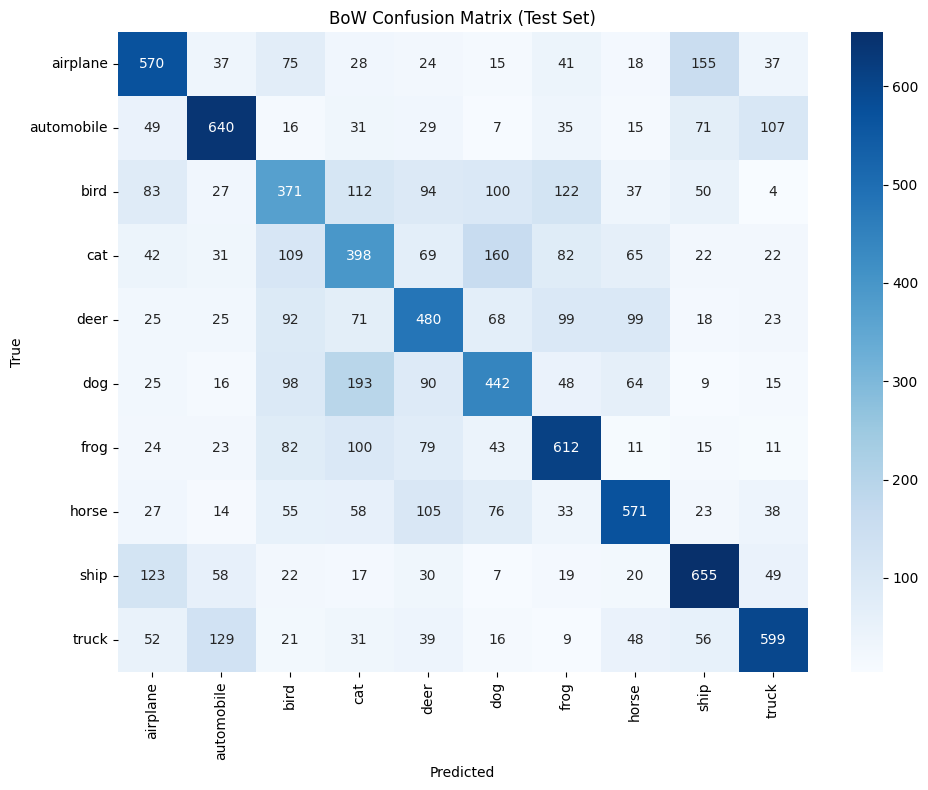

In [15]:
# === Confusion Matrix (Test) ===
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("BoW Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(f"{RESULT_DIR}/cnn_test_confusion_matrix.png", dpi=300)
plt.show()


Generating t-SNE scatter plot for Test set...


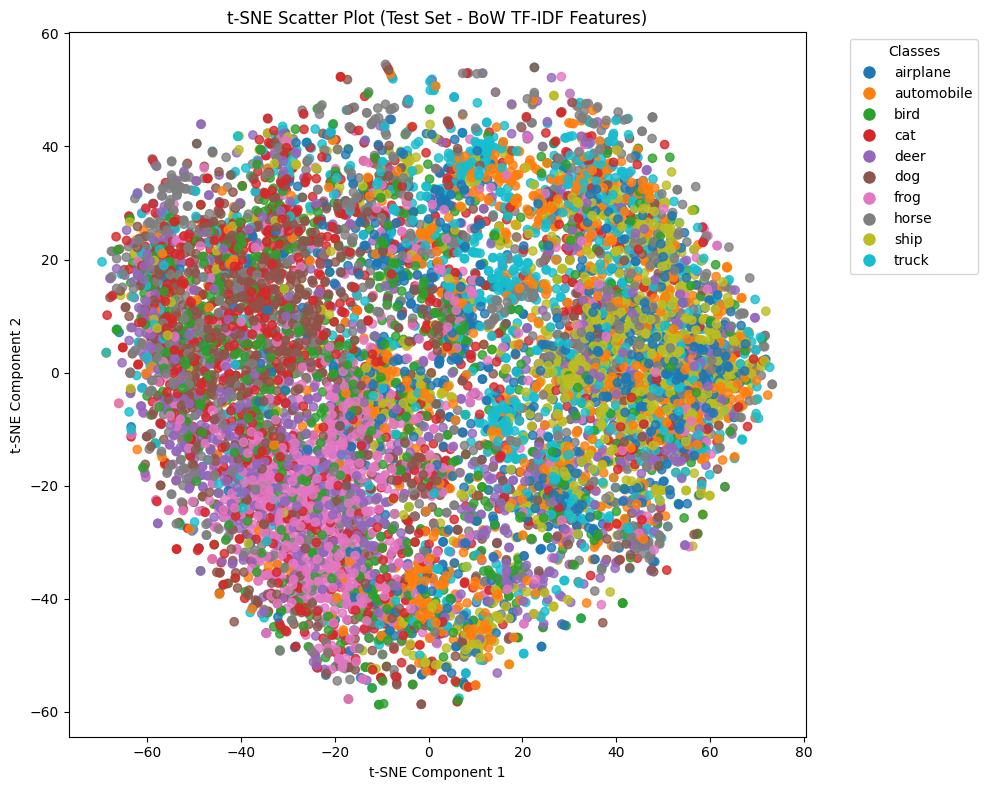

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tsne_bow(features, labels, dataset_name="BoW"):
    print(f"\nGenerating t-SNE scatter plot for {dataset_name} set...")

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    reduced = tsne.fit_transform(features)

    # Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', alpha=0.8)
    
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w',
                                label=label, markerfacecolor=scatter.cmap(i / 10), markersize=10)
                     for i, label in enumerate(classes)]
    
    plt.legend(handles=legend_labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"t-SNE Scatter Plot ({dataset_name} Set - BoW TF-IDF Features)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.tight_layout()
    plt.savefig(f"tsne_bow_{dataset_name.lower()}.png", dpi=300)
    plt.show()

# === Generate t-SNE plots for BoW TF-IDF features ===
plot_tsne_bow(test_hist_tfidf, y_test, "Test")

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score, f1_score)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, ReLU, Add,
                                     GlobalAveragePooling2D, Dense, Dropout, Reshape, multiply)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import CosineDecay

# Load CIFAR-10 preprocessed .npy files
x_train = np.load('cifar10_train_cnn.npy')
x_val = np.load('cifar10_val_cnn.npy')
x_test = np.load('cifar10_test_cnn.npy')

y_train = np.load('cifar10_train_cnn_onehot.npy')
y_val = np.load('cifar10_val_cnn_onehot.npy')
y_test = np.load('cifar10_test_onehot.npy')

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# === Squeeze-and-Excitation Block ===
def se_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    return multiply([input_tensor, se])

# === Residual Block with SE ===
def residual_block(x, filters, downsample=False):
    shortcut = x
    stride = 2 if downsample else 1

    x = Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = se_block(x)
    x = ReLU()(x)
    return x

# === ResNet Model ===
def build_resnet_model(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = residual_block(x, 32)
    x = residual_block(x, 32)

    x = residual_block(x, 64, downsample=True)
    x = residual_block(x, 64)

    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

# Learning rate scheduler
cosine_schedule = CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=75 * (len(x_train) // 64),
    alpha=1e-5
)

model = build_resnet_model()
model.compile(optimizer=Adam(learning_rate=cosine_schedule),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

# === MixUp Data Augmentation ===
def mixup(generator, alpha=0.2):
    for x_batch, y_batch in generator:
        batch_size = x_batch.shape[0]
        l = np.random.beta(alpha, alpha)

        idx = np.random.permutation(batch_size)

        x_mix = l * x_batch + (1 - l) * x_batch[idx]
        y_mix = l * y_batch + (1 - l) * y_batch[idx]

        yield x_mix, y_mix

# === Data Generator with Augmentation ===
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
train_generator = mixup(datagen.flow(x_train, y_train, batch_size=64))

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# === Training ===
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 64,
    validation_data=(x_val, y_val),
    epochs=75,
    callbacks=[early_stop],
    verbose=2
)

# === Save model in HDF5 format ===
model.save('enhanced_resnet_cifar10_model.h5')
print("Enhanced ResNet model saved!")


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 32, 32, 32)     │            896 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 32, 32, 32)     │            128 │ conv2d_57[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_51 (ReLU)           │ (None, 32, 32, 32)     │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ re_lu_51[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_58    │ (None, 32, 32, 32)     │            128 │ conv2d_58[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_52 (ReLU)           │ (None, 32, 32, 32)     │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ re_lu_52[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_59    │ (None, 32, 32, 32)     │            128 │ conv2d_59[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 32, 32, 32)     │              0 │ batch_normalization_5… │
│                           │                        │                │ re_lu_51[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ add_24[0][0]           │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_54 (Dense)          │ (None, 2)              │             66 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_55 (Dense)          │ (None, 32)             │             96 │ dense_54[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_24 (Reshape)      │ (None, 1, 1, 32)       │              0 │ dense_55[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_24 (Multiply)    │ (None, 32, 32, 32)     │              0 │ add_24[0][0],          │
│                           │                        │                │ reshape_24[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_53 (ReLU)           │ (None, 32, 32, 32)     │              0 │ multiply_24[0][0]      │
├──────────────────────

 Total params: 1,336,886 (5.10 MB)

 Trainable params: 1,333,622 (5.09 MB)

 Non-trainable params: 3,264 (12.75 KB)

Epoch 1/75
703/703 - 56s - 80ms/step - accuracy: 0.3170 - loss: 1.9837 - val_accuracy: 0.3914 - val_loss: 1.8726
Epoch 2/75
703/703 - 32s - 45ms/step - accuracy: 0.5016 - loss: 1.7058 - val_accuracy: 0.4260 - val_loss: 2.0601
Epoch 3/75
703/703 - 23s - 32ms/step - accuracy: 0.5855 - loss: 1.5674 - val_accuracy: 0.6060 - val_loss: 1.3686
Epoch 4/75
703/703 - 23s - 33ms/step - accuracy: 0.6291 - loss: 1.5063 - val_accuracy: 0.5894 - val_loss: 1.4449
Epoch 5/75
703/703 - 23s - 32ms/step - accuracy: 0.6669 - loss: 1.4325 - val_accuracy: 0.6734 - val_loss: 1.2515
Epoch 6/75
703/703 - 23s - 33ms/step - accuracy: 0.7045 - loss: 1.3754 - val_accuracy: 0.6782 - val_loss: 1.2479
Epoch 7/75
703/703 - 23s - 32ms/step - accuracy: 0.7247 - loss: 1.3176 - val_accuracy: 0.7288 - val_loss: 1.1231
Epoch 8/75
703/703 - 22s - 32ms/step - accuracy: 0.7451 - loss: 1.2750 - val_accuracy: 0.7422 - val_loss: 1.1244
Epoch 9/75
703/703 - 23s - 32ms/step - accuracy: 0.7479 - loss: 1.2901 - val_accuracy: 0.7376 - 

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

def evaluate_model(x_data, y_true_onehot, dataset_name="Test"):
    # Load the model
    # model = load_model('resnet_cifar10_model.h5')
    model = load_model('enhanced_resnet_cifar10_model.h5')
    y_pred_probs = model.predict(x_data)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.argmax(y_true_onehot, axis=1)

    acc = accuracy_score(y_true_labels, y_pred_labels)
    macro_p = precision_score(y_true_labels, y_pred_labels, average='macro')
    macro_r = recall_score(y_true_labels, y_pred_labels, average='macro')
    macro_f = f1_score(y_true_labels, y_pred_labels, average='macro')

    weighted_p = precision_score(y_true_labels, y_pred_labels, average='weighted')
    weighted_r = recall_score(y_true_labels, y_pred_labels, average='weighted')
    weighted_f = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"\nResNet {dataset_name} Accuracy: {acc*100:.2f}%")
    print(f"\nResNet {dataset_name} Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels, target_names=classes, digits=3))
    print(f"\nMacro Avg — Precision: {macro_p:.3f}, Recall: {macro_r:.3f}, F1: {macro_f:.3f}")
    print(f"Weighted Avg — Precision: {weighted_p:.3f}, Recall: {weighted_r:.3f}, F1: {weighted_f:.3f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"ResNet Confusion Matrix ({dataset_name} Set)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{dataset_name.lower()}.png", dpi=300)
    plt.show()

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step

✅ Train Accuracy: 97.29%

🔍 Train Classification Report:
              precision    recall  f1-score   support

    airplane      0.980     0.983     0.981      4500
  automobile      0.987     0.995     0.991      4500
        bird      0.937     0.982     0.959      4500
         cat      0.949     0.931     0.940      4500
        deer      0.985     0.960     0.973      4500
         dog      0.963     0.932     0.947      4500
        frog      0.964     0.989     0.976      4500
       horse      0.980     0.985     0.982      4500
        ship      0.996     0.986     0.991      4500
       truck      0.990     0.986     0.988      4500

    accuracy                          0.973     45000
   macro avg      0.973     0.973     0.973     45000
weighted avg      0.973     0.973     0.973     45000


📊 Macro Avg — Precision: 0.973, Recall: 0.973, F1: 0.973
📊 Weighted Avg — Precision: 0.973, Recall: 0.973, F1: 0.973


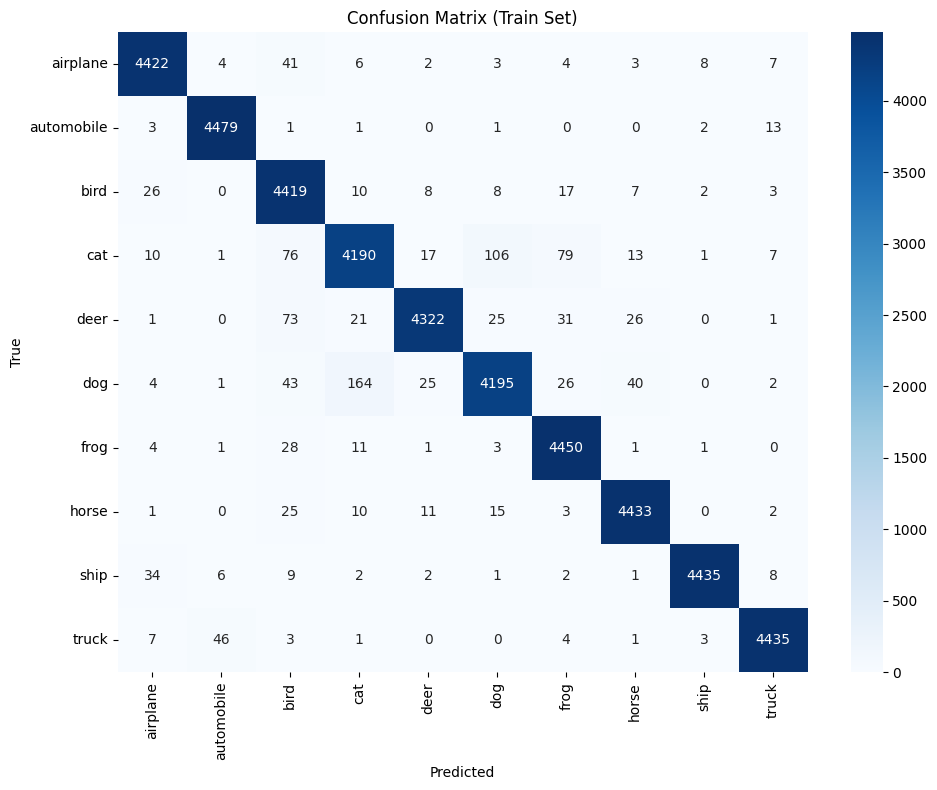

In [83]:
# === Evaluate on Train Set ===
evaluate_model(x_train, y_train, "Train")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step

✅ Test Accuracy: 90.83%

🔍 Test Classification Report:
              precision    recall  f1-score   support

    airplane      0.922     0.925     0.924      1000
  automobile      0.940     0.977     0.958      1000
        bird      0.836     0.917     0.875      1000
         cat      0.832     0.803     0.817      1000
        deer      0.932     0.865     0.897      1000
         dog      0.877     0.834     0.855      1000
        frog      0.910     0.945     0.927      1000
       horse      0.933     0.946     0.939      1000
        ship      0.961     0.930     0.945      1000
       truck      0.944     0.941     0.942      1000

    accuracy                          0.908     10000
   macro avg      0.909     0.908     0.908     10000
weighted avg      0.909     0.908     0.908     10000


📊 Macro Avg — Precision: 0.909, Recall: 0.908, F1: 0.908
📊 Weighted Avg — Precision: 0.909, Recall: 0.908, F1: 0.908


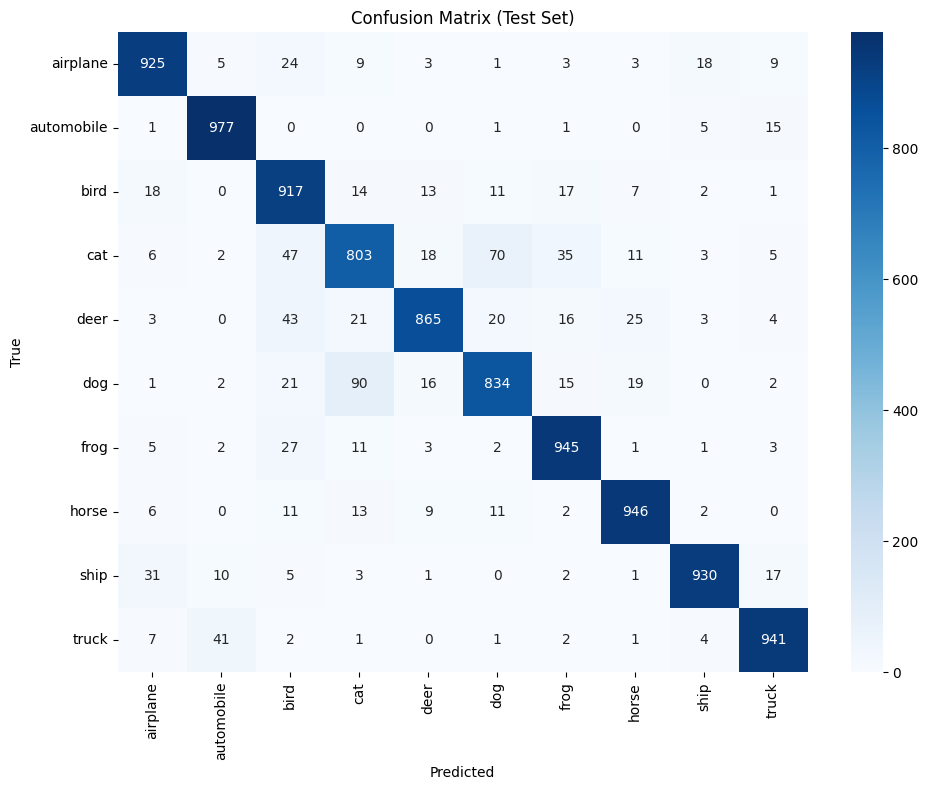

In [85]:
# === Evaluate on Test Set ===
evaluate_model(x_test, y_test, "Test")

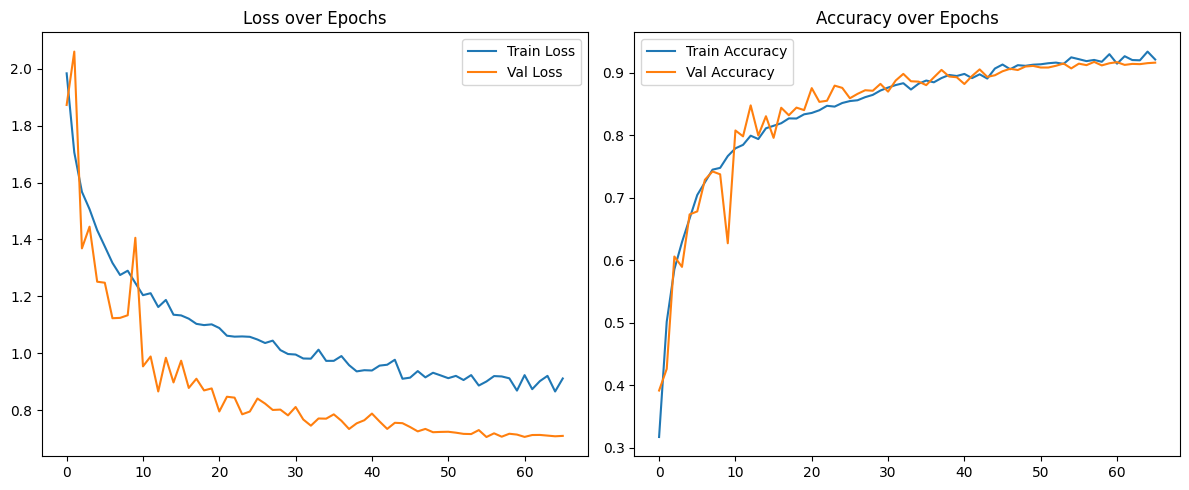

In [86]:
# === Plot training curves ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.tight_layout()
plt.savefig("cnn_training_curves_final.png", dpi=300)
plt.show()


📊 Generating t-SNE scatter plot for Train set...
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


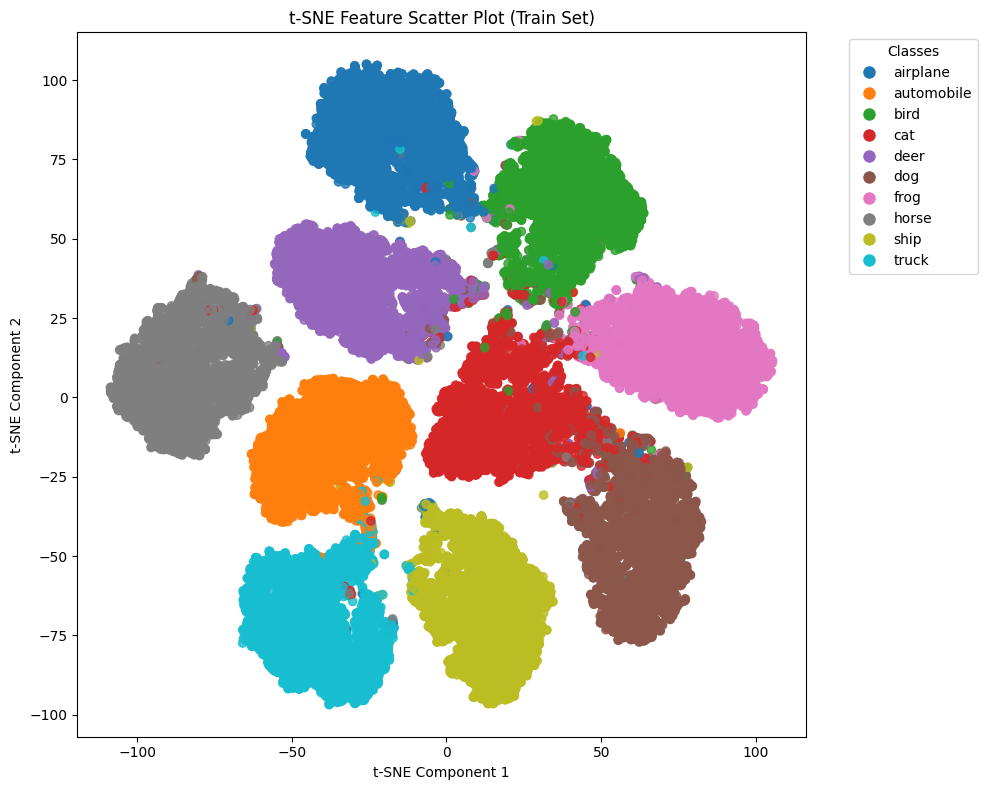

In [87]:
from sklearn.manifold import TSNE

def plot_tsne_scatter(x_data, y_data, dataset_name="Test"):
    print(f"\n📊 Generating t-SNE scatter plot for {dataset_name} set...")

    # Extract features
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    features = feature_extractor.predict(x_data)

    # Reduce with t-SNE (2D)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    reduced = tsne.fit_transform(features)

    y_labels = np.argmax(y_data, axis=1)

    # Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=y_labels, cmap='tab10', alpha=0.8)
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w',
                                label=label, markerfacecolor=scatter.cmap(i/10), markersize=10)
                     for i, label in enumerate(classes)]
    plt.legend(handles=legend_labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"t-SNE Feature Scatter Plot ({dataset_name} Set)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.tight_layout()
    plt.savefig(f"tsne_plot_{dataset_name.lower()}.png", dpi=300)
    plt.show()

# Generate t-SNE plots
plot_tsne_scatter(x_train, y_train, "Train")



📊 Generating t-SNE scatter plot for Test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


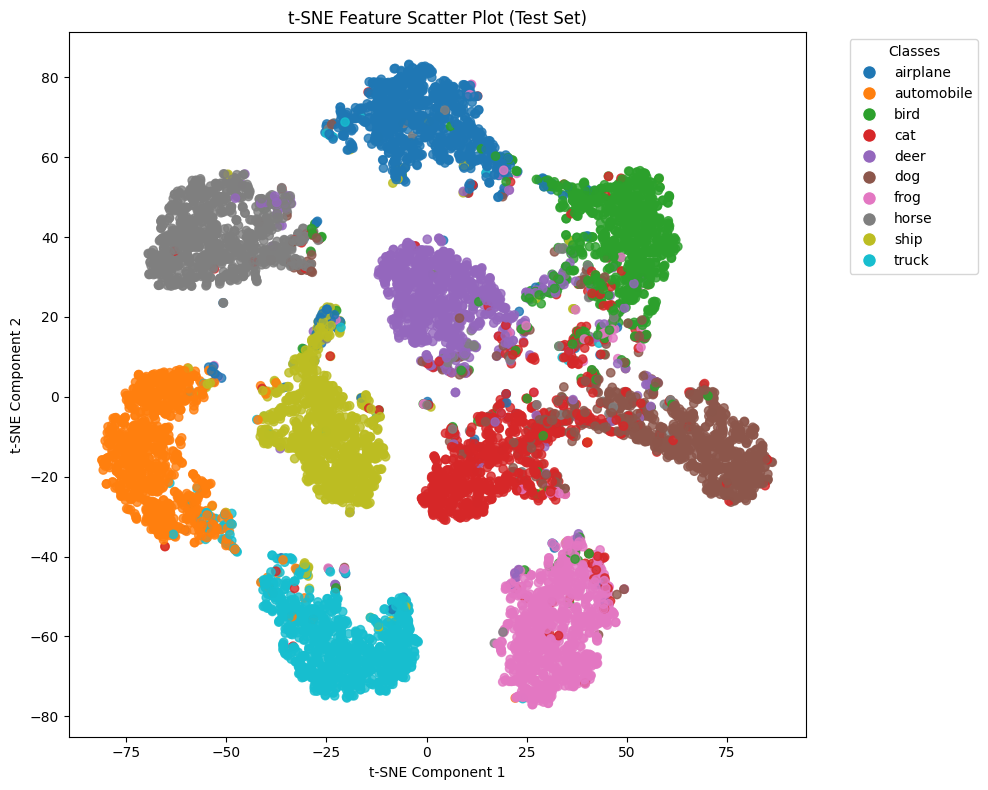

In [89]:
plot_tsne_scatter(x_test, y_test, "Test")